In [1]:
seed_value=42

import os
os.environ['PYTHONHASHSEED']=str(seed_value)

import random
random.seed(seed_value)

import numpy as np
np.random.seed(seed_value)

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('Perovskite_Stability_with_features.csv')
df

,Material Composition,A site #1,A site #2,A site #3,B site #1,B site #2,B site #3,X site,Number of elements,energy_above_hull (meV/atom),...,host_Asite0_IsBCC,host_Asite0_IsCubic,host_Asite0_IsAlkali,host_Asite0_OrbitalD,host_Asite0_NsValence,host_Bsite0_At. #,host_Bsite0_IsHexagonal,host_Bsite0_IsNoblegas,Asite_IsAlkali_max,Bsite_IsMetal_max
0,Ba1Sr7V8O24,Ba,Sr,NaN,V,NaN,NaN,O,4,29.747707,...,0,0,0,0,2,23,0,0,1,1
1,Ba2Bi2Pr4Co8O24,Ba,Bi,Pr,Co,NaN,NaN,O,5,106.702335,...,0,0,0,0,2,27,1,0,1,1
2,Ba2Ca6Fe8O24,Ba,Ca,NaN,Fe,NaN,NaN,O,4,171.608093,...,0,0,0,0,2,26,0,0,1,1
3,Ba2Cd2Pr4Ni8O24,Ba,Cd,Pr,Ni,NaN,NaN,O,5,284.898190,...,0,0,0,0,2,28,0,0,1,1
4,Ba2Dy6Fe8O24,Ba,Dy,NaN,Fe,NaN,NaN,O,4,270.007913,...,0,0,0,0,2,26,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,Y8V7Co1O24,Y,NaN,NaN,V,Co,NaN,O,4,1.588513,...,0,0,0,1,2,23,0,0,0,1
1925,Y8V7Cr1O24,Y,NaN,NaN,V,Cr,NaN,O,4,0.000000,...,0,0,0,1,2,23,0,0,0,1
1926,Y8V7Fe1O24,Y,NaN,NaN,V,Fe,NaN,O,4,0.000000,...,0,0,0,1,2,23,0,0,0,1
1927,Y8V7Ni1O24,Y,NaN,NaN,V,Ni,NaN,O,4,0.000000,...,0,0,0,1,2,23,0,0,0,1


In [4]:
df = df.drop(columns='formation_energy (eV/atom)')
df

,Material Composition,A site #1,A site #2,A site #3,B site #1,B site #2,B site #3,X site,Number of elements,energy_above_hull (meV/atom),...,host_Asite0_IsBCC,host_Asite0_IsCubic,host_Asite0_IsAlkali,host_Asite0_OrbitalD,host_Asite0_NsValence,host_Bsite0_At. #,host_Bsite0_IsHexagonal,host_Bsite0_IsNoblegas,Asite_IsAlkali_max,Bsite_IsMetal_max
0,Ba1Sr7V8O24,Ba,Sr,NaN,V,NaN,NaN,O,4,29.747707,...,0,0,0,0,2,23,0,0,1,1
1,Ba2Bi2Pr4Co8O24,Ba,Bi,Pr,Co,NaN,NaN,O,5,106.702335,...,0,0,0,0,2,27,1,0,1,1
2,Ba2Ca6Fe8O24,Ba,Ca,NaN,Fe,NaN,NaN,O,4,171.608093,...,0,0,0,0,2,26,0,0,1,1
3,Ba2Cd2Pr4Ni8O24,Ba,Cd,Pr,Ni,NaN,NaN,O,5,284.898190,...,0,0,0,0,2,28,0,0,1,1
4,Ba2Dy6Fe8O24,Ba,Dy,NaN,Fe,NaN,NaN,O,4,270.007913,...,0,0,0,0,2,26,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,Y8V7Co1O24,Y,NaN,NaN,V,Co,NaN,O,4,1.588513,...,0,0,0,1,2,23,0,0,0,1
1925,Y8V7Cr1O24,Y,NaN,NaN,V,Cr,NaN,O,4,0.000000,...,0,0,0,1,2,23,0,0,0,1
1926,Y8V7Fe1O24,Y,NaN,NaN,V,Fe,NaN,O,4,0.000000,...,0,0,0,1,2,23,0,0,0,1
1927,Y8V7Ni1O24,Y,NaN,NaN,V,Ni,NaN,O,4,0.000000,...,0,0,0,1,2,23,0,0,0,1


In [5]:
df['X site'].value_counts()

O    1929
Name: X site, dtype: int64

In [6]:
df.columns

Index(['Material Composition', 'A site #1', 'A site #2', 'A site #3',
       'B site #1', 'B site #2', 'B site #3', 'X site', 'Number of elements',
       'energy_above_hull (meV/atom)', 'num_of_atoms_host_Asite0',
       'host_Asite0_Heat of Vaporization', 'host_Bsite0_at. wt.',
       'host_Bsite0_Ionization Energy (kJ/mol)', 'shannon_radii_AB_avg',
       'Density_AB_avg', 'BCCefflatcnt_AB_avg', 'BCCvolume_padiff_AB_avg',
       'GSenergy_pa_AB_avg', 'ICSDVolume_AB_avg', 'covalent radius_AB_avg',
       'Ionization Energy (kJ/mol)_AB_avg',
       'Electron Affinity (kJ/mol)_AB_avg', 'Atomic Volume (cm³/mol)_AB_avg',
       'MendeleevNumber_AB_avg', 'First Ionization Potential (V)_AB_avg',
       'thermal conductivity_AB_avg', 'at. wt._AB_diff',
       'specific heat capacity_AB_diff', 'electrical conductivity_AB_diff',
       'BCCefflatcnt_AB_ratio', 'Ionization Energy (kJ/mol)_AB_ratio',
       'Heat of Vaporization_AB_ratio', 'Asite_BCCvolume_pa_weighted_avg',
       'Asite_BCCvol

In [7]:
df.describe()

,Number of elements,energy_above_hull (meV/atom),num_of_atoms_host_Asite0,host_Asite0_Heat of Vaporization,host_Bsite0_at. wt.,host_Bsite0_Ionization Energy (kJ/mol),shannon_radii_AB_avg,Density_AB_avg,BCCefflatcnt_AB_avg,BCCvolume_padiff_AB_avg,...,host_Asite0_IsBCC,host_Asite0_IsCubic,host_Asite0_IsAlkali,host_Asite0_OrbitalD,host_Asite0_NsValence,host_Bsite0_At. #,host_Bsite0_IsHexagonal,host_Bsite0_IsNoblegas,Asite_IsAlkali_max,Bsite_IsMetal_max
count,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,1929.000000,...,1929.000000,1929.0,1929.0,1929.000000,1929.0,1929.000000,1929.000000,1929.0,1929.000000,1929.0
mean,4.284085,105.532633,6.100570,270.521830,59.640178,705.063867,0.960641,6.097906,7.310155,-0.078693,...,0.219285,0.0,0.0,0.354069,2.0,27.162779,0.303784,0.0,0.582167,1.0
std,0.535232,98.395552,1.748812,116.946676,21.252029,56.529385,0.088519,1.112604,0.408719,0.318538,...,0.413869,0.0,0.0,0.478354,0.0,8.238310,0.460010,0.0,0.493330,0.0
min,3.000000,0.000000,3.000000,99.870000,24.305000,577.600000,0.742500,2.882500,6.355729,-2.673750,...,0.000000,0.0,0.0,0.000000,2.0,12.000000,0.000000,0.0,0.000000,1.0
25%,4.000000,33.436112,4.000000,140.200000,51.996000,652.800000,0.893750,5.370000,6.958757,-0.248125,...,0.000000,0.0,0.0,0.000000,2.0,24.000000,0.000000,0.0,0.000000,1.0
50%,4.000000,84.202506,6.000000,332.630000,55.847000,717.400000,0.960000,6.043750,7.272569,0.032188,...,0.000000,0.0,0.0,0.000000,2.0,26.000000,0.000000,0.0,1.000000,1.0
75%,5.000000,155.909864,8.000000,393.300000,58.933200,758.000000,1.017500,6.776875,7.602382,0.128125,...,0.000000,0.0,0.0,1.000000,2.0,28.000000,1.000000,0.0,1.000000,1.0
max,6.000000,956.831956,8.000000,399.570000,195.080000,906.400000,1.255000,13.095000,9.050862,0.387292,...,1.000000,0.0,0.0,1.000000,2.0,78.000000,1.000000,0.0,1.000000,1.0


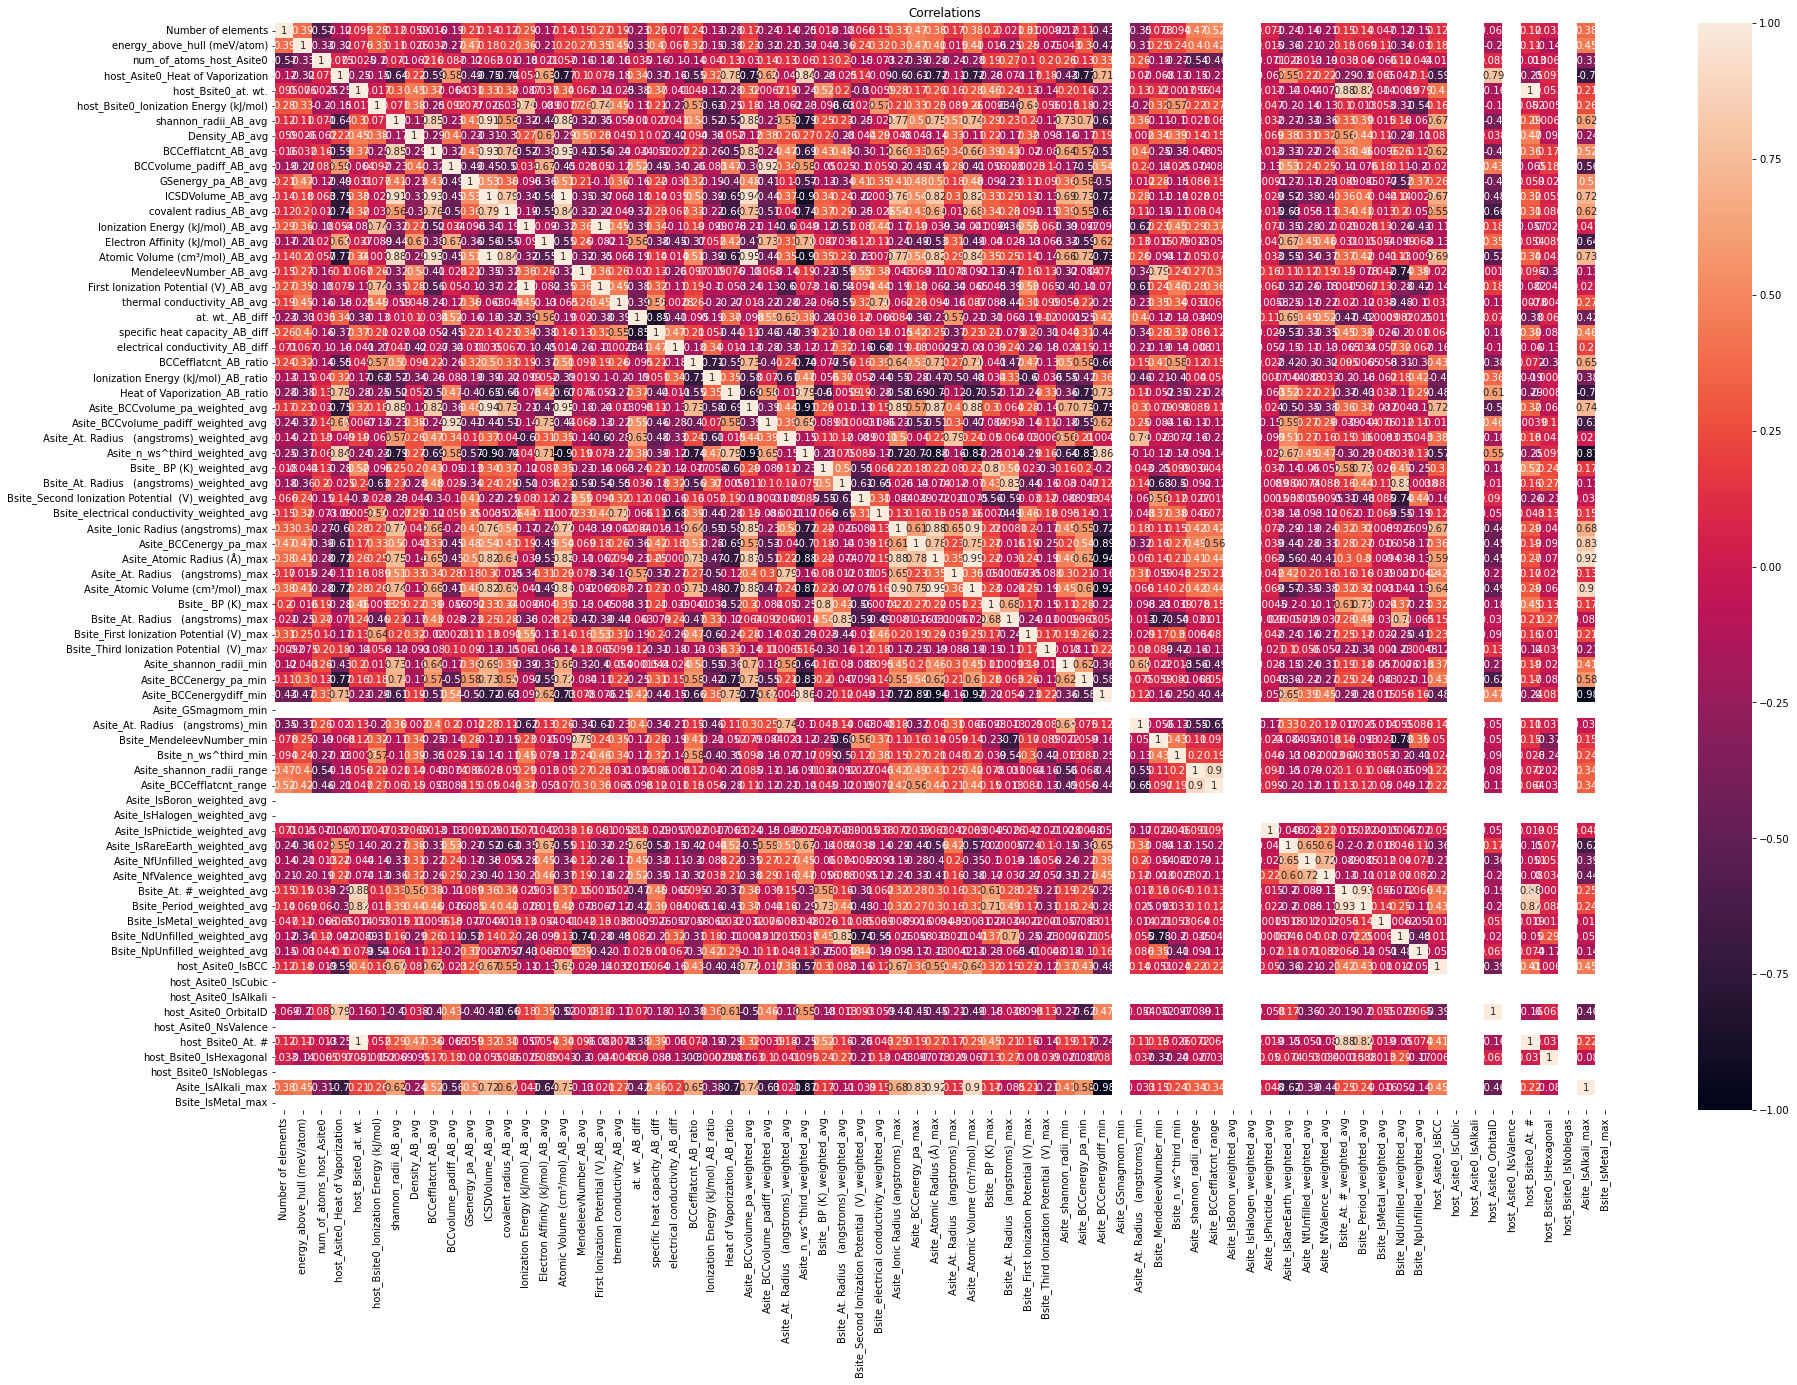

In [8]:
plt.figure(figsize=(30, 20))
sns.heatmap(df.iloc[:,3:].corr(), annot=True, vmin=-1, vmax=1)
plt.title('Correlations')
plt.show()

In [9]:
cor_matrix = df.iloc[:,3:].corr().abs()
print(cor_matrix)

                                  Number of elements  \
Number of elements                          1.000000   
energy_above_hull (meV/atom)                0.385618   
num_of_atoms_host_Asite0                    0.566932   
host_Asite0_Heat of Vaporization            0.116712   
host_Bsite0_at. wt.                         0.094813   
...                                              ...   
host_Bsite0_At. #                           0.115605   
host_Bsite0_IsHexagonal                     0.032708   
host_Bsite0_IsNoblegas                           NaN   
Asite_IsAlkali_max                          0.379060   
Bsite_IsMetal_max                                NaN   

                                  energy_above_hull (meV/atom)  \
Number of elements                                    0.385618   
energy_above_hull (meV/atom)                          1.000000   
num_of_atoms_host_Asite0                              0.333890   
host_Asite0_Heat of Vaporization                      0.316891 

In [10]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                                  Number of elements  \
Number of elements                               NaN   
energy_above_hull (meV/atom)                     NaN   
num_of_atoms_host_Asite0                         NaN   
host_Asite0_Heat of Vaporization                 NaN   
host_Bsite0_at. wt.                              NaN   
...                                              ...   
host_Bsite0_At. #                                NaN   
host_Bsite0_IsHexagonal                          NaN   
host_Bsite0_IsNoblegas                           NaN   
Asite_IsAlkali_max                               NaN   
Bsite_IsMetal_max                                NaN   

                                  energy_above_hull (meV/atom)  \
Number of elements                                    0.385618   
energy_above_hull (meV/atom)                               NaN   
num_of_atoms_host_Asite0                                   NaN   
host_Asite0_Heat of Vaporization                           NaN 

In [11]:
lower_tri = cor_matrix.where(np.tril(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(lower_tri)

                                  Number of elements  \
Number of elements                          1.000000   
energy_above_hull (meV/atom)                0.385618   
num_of_atoms_host_Asite0                    0.566932   
host_Asite0_Heat of Vaporization            0.116712   
host_Bsite0_at. wt.                         0.094813   
...                                              ...   
host_Bsite0_At. #                           0.115605   
host_Bsite0_IsHexagonal                     0.032708   
host_Bsite0_IsNoblegas                           NaN   
Asite_IsAlkali_max                          0.379060   
Bsite_IsMetal_max                                NaN   

                                  energy_above_hull (meV/atom)  \
Number of elements                                    0.385618   
energy_above_hull (meV/atom)                          1.000000   
num_of_atoms_host_Asite0                              0.333890   
host_Asite0_Heat of Vaporization                      0.316891 

In [12]:
print(f"energy_above_hull (meV/atom): max: {max(upper_tri['energy_above_hull (meV/atom)'])} e min: {min(lower_tri['energy_above_hull (meV/atom)'])}")

energy_above_hull (meV/atom): max: 0.3856184311098117 e min: 0.01469684674769243


In [13]:
for column in upper_tri.columns:
    if any(upper_tri[column] > 0.90):
        print(f'{column}: {max(upper_tri[column])}')

ICSDVolume_AB_avg: 0.9343009196931436
Atomic Volume (cm³/mol)_AB_avg: 0.9952147400731485
First Ionization Potential (V)_AB_avg: 0.9955930081317
Asite_BCCvolume_pa_weighted_avg: 0.9492631416833196
Asite_BCCvolume_padiff_weighted_avg: 0.9156705026211283
Asite_n_ws^third_weighted_avg: 0.9147621849784651
Asite_Atomic Volume (cm³/mol)_max: 0.9915017792969342
Asite_BCCenergydiff_min: 0.9358719652594696
Asite_BCCefflatcnt_range: 0.9015643464564174
Bsite_Period_weighted_avg: 0.9275353069464891
host_Bsite0_At. #: 0.9969157792655173
Asite_IsAlkali_max: 0.9820365943736675


In [14]:
upper_tri.columns

Index(['Number of elements', 'energy_above_hull (meV/atom)',
       'num_of_atoms_host_Asite0', 'host_Asite0_Heat of Vaporization',
       'host_Bsite0_at. wt.', 'host_Bsite0_Ionization Energy (kJ/mol)',
       'shannon_radii_AB_avg', 'Density_AB_avg', 'BCCefflatcnt_AB_avg',
       'BCCvolume_padiff_AB_avg', 'GSenergy_pa_AB_avg', 'ICSDVolume_AB_avg',
       'covalent radius_AB_avg', 'Ionization Energy (kJ/mol)_AB_avg',
       'Electron Affinity (kJ/mol)_AB_avg', 'Atomic Volume (cm³/mol)_AB_avg',
       'MendeleevNumber_AB_avg', 'First Ionization Potential (V)_AB_avg',
       'thermal conductivity_AB_avg', 'at. wt._AB_diff',
       'specific heat capacity_AB_diff', 'electrical conductivity_AB_diff',
       'BCCefflatcnt_AB_ratio', 'Ionization Energy (kJ/mol)_AB_ratio',
       'Heat of Vaporization_AB_ratio', 'Asite_BCCvolume_pa_weighted_avg',
       'Asite_BCCvolume_padiff_weighted_avg',
       'Asite_At. Radius   (angstroms)_weighted_avg',
       'Asite_n_ws^third_weighted_avg', 'Bsite

In [15]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
print(to_drop)

['ICSDVolume_AB_avg', 'Atomic Volume (cm³/mol)_AB_avg', 'First Ionization Potential (V)_AB_avg', 'Asite_BCCvolume_pa_weighted_avg', 'Asite_BCCvolume_padiff_weighted_avg', 'Asite_n_ws^third_weighted_avg', 'Asite_Atomic Volume (cm³/mol)_max', 'Asite_BCCenergydiff_min', 'Asite_BCCefflatcnt_range', 'Bsite_Period_weighted_avg', 'host_Bsite0_At. #', 'Asite_IsAlkali_max']


In [16]:
df = df.drop(to_drop, axis=1)
df

,Material Composition,A site #1,A site #2,A site #3,B site #1,B site #2,B site #3,X site,Number of elements,energy_above_hull (meV/atom),...,Bsite_NdUnfilled_weighted_avg,Bsite_NpUnfilled_weighted_avg,host_Asite0_IsBCC,host_Asite0_IsCubic,host_Asite0_IsAlkali,host_Asite0_OrbitalD,host_Asite0_NsValence,host_Bsite0_IsHexagonal,host_Bsite0_IsNoblegas,Bsite_IsMetal_max
0,Ba1Sr7V8O24,Ba,Sr,NaN,V,NaN,NaN,O,4,29.747707,...,7.000,0.0,0,0,0,0,2,0,0,1
1,Ba2Bi2Pr4Co8O24,Ba,Bi,Pr,Co,NaN,NaN,O,5,106.702335,...,3.000,0.0,0,0,0,0,2,1,0,1
2,Ba2Ca6Fe8O24,Ba,Ca,NaN,Fe,NaN,NaN,O,4,171.608093,...,4.000,0.0,0,0,0,0,2,0,0,1
3,Ba2Cd2Pr4Ni8O24,Ba,Cd,Pr,Ni,NaN,NaN,O,5,284.898190,...,2.000,0.0,0,0,0,0,2,0,0,1
4,Ba2Dy6Fe8O24,Ba,Dy,NaN,Fe,NaN,NaN,O,4,270.007913,...,4.000,0.0,0,0,0,0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,Y8V7Co1O24,Y,NaN,NaN,V,Co,NaN,O,4,1.588513,...,6.500,0.0,0,0,0,1,2,0,0,1
1925,Y8V7Cr1O24,Y,NaN,NaN,V,Cr,NaN,O,4,0.000000,...,6.750,0.0,0,0,0,1,2,0,0,1
1926,Y8V7Fe1O24,Y,NaN,NaN,V,Fe,NaN,O,4,0.000000,...,6.625,0.0,0,0,0,1,2,0,0,1
1927,Y8V7Ni1O24,Y,NaN,NaN,V,Ni,NaN,O,4,0.000000,...,6.375,0.0,0,0,0,1,2,0,0,1


In [17]:
df.columns

Index(['Material Composition', 'A site #1', 'A site #2', 'A site #3',
       'B site #1', 'B site #2', 'B site #3', 'X site', 'Number of elements',
       'energy_above_hull (meV/atom)', 'num_of_atoms_host_Asite0',
       'host_Asite0_Heat of Vaporization', 'host_Bsite0_at. wt.',
       'host_Bsite0_Ionization Energy (kJ/mol)', 'shannon_radii_AB_avg',
       'Density_AB_avg', 'BCCefflatcnt_AB_avg', 'BCCvolume_padiff_AB_avg',
       'GSenergy_pa_AB_avg', 'covalent radius_AB_avg',
       'Ionization Energy (kJ/mol)_AB_avg',
       'Electron Affinity (kJ/mol)_AB_avg', 'MendeleevNumber_AB_avg',
       'thermal conductivity_AB_avg', 'at. wt._AB_diff',
       'specific heat capacity_AB_diff', 'electrical conductivity_AB_diff',
       'BCCefflatcnt_AB_ratio', 'Ionization Energy (kJ/mol)_AB_ratio',
       'Heat of Vaporization_AB_ratio',
       'Asite_At. Radius   (angstroms)_weighted_avg',
       'Bsite_ BP (K)_weighted_avg',
       'Bsite_At. Radius   (angstroms)_weighted_avg',
       'Bsite

In [18]:
df

,Material Composition,A site #1,A site #2,A site #3,B site #1,B site #2,B site #3,X site,Number of elements,energy_above_hull (meV/atom),...,Bsite_NdUnfilled_weighted_avg,Bsite_NpUnfilled_weighted_avg,host_Asite0_IsBCC,host_Asite0_IsCubic,host_Asite0_IsAlkali,host_Asite0_OrbitalD,host_Asite0_NsValence,host_Bsite0_IsHexagonal,host_Bsite0_IsNoblegas,Bsite_IsMetal_max
0,Ba1Sr7V8O24,Ba,Sr,NaN,V,NaN,NaN,O,4,29.747707,...,7.000,0.0,0,0,0,0,2,0,0,1
1,Ba2Bi2Pr4Co8O24,Ba,Bi,Pr,Co,NaN,NaN,O,5,106.702335,...,3.000,0.0,0,0,0,0,2,1,0,1
2,Ba2Ca6Fe8O24,Ba,Ca,NaN,Fe,NaN,NaN,O,4,171.608093,...,4.000,0.0,0,0,0,0,2,0,0,1
3,Ba2Cd2Pr4Ni8O24,Ba,Cd,Pr,Ni,NaN,NaN,O,5,284.898190,...,2.000,0.0,0,0,0,0,2,0,0,1
4,Ba2Dy6Fe8O24,Ba,Dy,NaN,Fe,NaN,NaN,O,4,270.007913,...,4.000,0.0,0,0,0,0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,Y8V7Co1O24,Y,NaN,NaN,V,Co,NaN,O,4,1.588513,...,6.500,0.0,0,0,0,1,2,0,0,1
1925,Y8V7Cr1O24,Y,NaN,NaN,V,Cr,NaN,O,4,0.000000,...,6.750,0.0,0,0,0,1,2,0,0,1
1926,Y8V7Fe1O24,Y,NaN,NaN,V,Fe,NaN,O,4,0.000000,...,6.625,0.0,0,0,0,1,2,0,0,1
1927,Y8V7Ni1O24,Y,NaN,NaN,V,Ni,NaN,O,4,0.000000,...,6.375,0.0,0,0,0,1,2,0,0,1


In [19]:
df = df.loc[df['energy_above_hull (meV/atom)'] <= 400,:]
df

,Material Composition,A site #1,A site #2,A site #3,B site #1,B site #2,B site #3,X site,Number of elements,energy_above_hull (meV/atom),...,Bsite_NdUnfilled_weighted_avg,Bsite_NpUnfilled_weighted_avg,host_Asite0_IsBCC,host_Asite0_IsCubic,host_Asite0_IsAlkali,host_Asite0_OrbitalD,host_Asite0_NsValence,host_Bsite0_IsHexagonal,host_Bsite0_IsNoblegas,Bsite_IsMetal_max
0,Ba1Sr7V8O24,Ba,Sr,NaN,V,NaN,NaN,O,4,29.747707,...,7.000,0.0,0,0,0,0,2,0,0,1
1,Ba2Bi2Pr4Co8O24,Ba,Bi,Pr,Co,NaN,NaN,O,5,106.702335,...,3.000,0.0,0,0,0,0,2,1,0,1
2,Ba2Ca6Fe8O24,Ba,Ca,NaN,Fe,NaN,NaN,O,4,171.608093,...,4.000,0.0,0,0,0,0,2,0,0,1
3,Ba2Cd2Pr4Ni8O24,Ba,Cd,Pr,Ni,NaN,NaN,O,5,284.898190,...,2.000,0.0,0,0,0,0,2,0,0,1
4,Ba2Dy6Fe8O24,Ba,Dy,NaN,Fe,NaN,NaN,O,4,270.007913,...,4.000,0.0,0,0,0,0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,Y8V7Co1O24,Y,NaN,NaN,V,Co,NaN,O,4,1.588513,...,6.500,0.0,0,0,0,1,2,0,0,1
1925,Y8V7Cr1O24,Y,NaN,NaN,V,Cr,NaN,O,4,0.000000,...,6.750,0.0,0,0,0,1,2,0,0,1
1926,Y8V7Fe1O24,Y,NaN,NaN,V,Fe,NaN,O,4,0.000000,...,6.625,0.0,0,0,0,1,2,0,0,1
1927,Y8V7Ni1O24,Y,NaN,NaN,V,Ni,NaN,O,4,0.000000,...,6.375,0.0,0,0,0,1,2,0,0,1


In [20]:
X = df.drop(['Material Composition', 'A site #1', 'A site #2', 'A site #3',
       'B site #1', 'B site #2', 'B site #3', 'X site', 'energy_above_hull (meV/atom)'], axis=1)
y = df.loc[:,'energy_above_hull (meV/atom)']

In [21]:
idx = df.index
idx

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928],
           dtype='int64', length=1918)

In [22]:
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X,y,idx,test_size=0.20, random_state=42)

In [23]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
from sklearn.tree._classes import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=20, max_features='auto', min_samples_leaf=4, min_samples_split=10,random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20, max_features='auto', min_samples_leaf=4,
                      min_samples_split=10, random_state=42)

In [25]:
from sklearn.ensemble._forest import ExtraTreesRegressor
ex = ExtraTreesRegressor(bootstrap=False, max_depth=20, max_features='auto', min_samples_leaf=1, min_samples_split=2, n_estimators=1200, random_state = 42)
ex.fit(X_train, y_train)

ExtraTreesRegressor(max_depth=20, n_estimators=1200, random_state=42)

In [26]:
from sklearn.ensemble._forest import RandomForestRegressor
rf = RandomForestRegressor(bootstrap=True, max_depth=20, max_features='auto', min_samples_leaf=1, min_samples_split=2, n_estimators=2400, random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=2400, random_state=42)

In [27]:
list_models = [('DecisionTreeRegressor', dt),
               ('ExtraTreesRegressor', ex),
               ('RandomForestRegressor', rf)]

In [28]:
from sklearn import metrics

def predict_model(name, model):
    print(f'Predicting for {name}')
    y_pred = model.predict(X_test)
    
    mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    r2 = metrics.r2_score(y_test, y_pred)
    
    results = {'model': name, 'mape': mape, 'mae': mae, 'mse': mse, 'rmse': rmse, 'r2': r2}
    return results, y_pred

In [29]:
list_results = []
preds = {}
for name, model in list_models:
    result, pred = predict_model(name, model)
    list_results.append(result)
    preds[name] = pred

Predicting for DecisionTreeRegressor
Predicting for ExtraTreesRegressor
Predicting for RandomForestRegressor


In [30]:
results_data = pd.DataFrame(list_results)

In [31]:
results_data.sort_values(by='r2')

,model,mape,mae,mse,rmse,r2
0,DecisionTreeRegressor,1.097044e+16,25.403236,2055.398652,45.336505,0.744696
2,RandomForestRegressor,1.382655e+16,19.973226,1236.629539,35.165744,0.846396
1,ExtraTreesRegressor,1.166785e+16,17.274349,1029.261289,32.082102,0.872154


In [32]:
# Visualizing the Test set results

def generate_chart(title, pred):
    x = np.linspace(0, 400)
    plt.scatter(y_test, pred , color = "red", s=10)
    plt.plot(x, x, color = "green")
    plt.title(title)
    plt.xlabel("Valores Reais")
    plt.ylabel("Valores Obtidos na Predição")
    plt.show()

In [33]:
for index, row in results_data.sort_values(by='mape').iterrows():
    print(row['model'])

DecisionTreeRegressor
ExtraTreesRegressor
RandomForestRegressor


In [34]:
rf_pred = preds['RandomForestRegressor'].tolist()
ex_pred = preds['ExtraTreesRegressor'].tolist()
dt_pred = preds['DecisionTreeRegressor'].tolist()


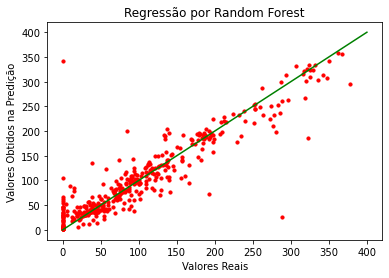

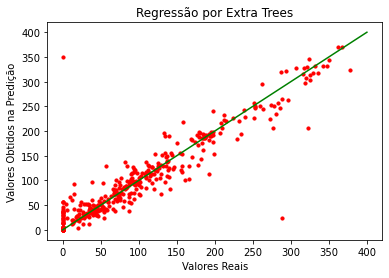

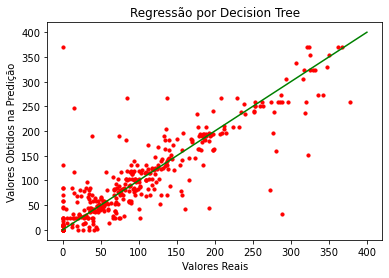

In [35]:
generate_chart('Regressão por Random Forest', rf_pred)
generate_chart('Regressão por Extra Trees', ex_pred)
generate_chart('Regressão por Decision Tree', dt_pred)


In [36]:
def feature_importance(model, title):
    plt.figure(figsize=(16, 12))
    pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True).plot.barh()
    plt.title(title)
    plt.show()

In [37]:
from sklearn.model_selection import GridSearchCV
def optimize_model(model, param_grid):
    grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv=3, n_jobs = -1, verbose = 2)
    grid_search.fit(X_train, y_train)
    return grid_search

In [38]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

## Random Forest

In [39]:
from sklearn.pipeline import Pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scalar = MinMaxScaler()
#pipeline_rf = Pipeline([('transformer', scalar), ('estimator', RandomForestRegressor())])

param_grid_rf = {
 'max_depth': [10, 20, 30, 50, 100],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 600, 1200, 2400]}
rf_grid = optimize_model(RandomForestRegressor(random_state=42), param_grid_rf)
rf_grid.best_params_

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 2400}

In [40]:
#Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate

folds = 21

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1/folds), random_state=42)
scalar = MinMaxScaler()
pipeline_rf = Pipeline([('transformer', scalar), ('estimator', rf)])

cv = KFold(n_splits=(folds - 1))
scores_rf = cross_validate(pipeline_rf, X_train, y_train, cv = cv, scoring=['r2', 'neg_mean_absolute_percentage_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error'])

df_rf = pd.DataFrame(scores_rf).mean()
df_rf

fit_time                                   5.452711e+01
score_time                                 1.883000e-01
test_r2                                    8.713401e-01
test_neg_mean_absolute_percentage_error   -1.102497e+16
test_neg_mean_absolute_error              -1.898059e+01
test_neg_mean_squared_error               -9.586069e+02
test_neg_root_mean_squared_error          -3.053322e+01
dtype: float64

In [41]:
pd.DataFrame(scores_rf).std()

fit_time                                   8.950518e-01
score_time                                 1.119796e-02
test_r2                                    5.031032e-02
test_neg_mean_absolute_percentage_error    6.784103e+15
test_neg_mean_absolute_error               2.110581e+00
test_neg_mean_squared_error                3.395157e+02
test_neg_root_mean_squared_error           5.264519e+00
dtype: float64

## ExtraTrees

In [42]:
# Otimization

from sklearn.pipeline import Pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scalar = MinMaxScaler()
#pipeline_ex = Pipeline([('transformer', scalar), ('estimator', ExtraTreesRegressor())])

param_grid_ex = {
 'max_depth': [10, 20, 30, 50, 100],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 600, 1200, 2400]}
ex_grid = optimize_model(ExtraTreesRegressor(random_state=42), param_grid_ex)
ex_grid.best_params_

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1200}

In [43]:
#Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

folds = 21

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1/folds), random_state=42)
scalar = MinMaxScaler()
pipeline_ex = Pipeline([('transformer', scalar), ('estimator', ex)])

cv = KFold(n_splits=(folds - 1))
scores_ex = cross_validate(pipeline_ex, X_train, y_train, cv = cv, scoring=['r2', 'neg_mean_absolute_percentage_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error'])

df_ex = pd.DataFrame(scores_ex).mean()
df_ex

fit_time                                   1.879917e+01
score_time                                 1.517998e-01
test_r2                                    8.931618e-01
test_neg_mean_absolute_percentage_error   -9.219634e+15
test_neg_mean_absolute_error              -1.625719e+01
test_neg_mean_squared_error               -7.965295e+02
test_neg_root_mean_squared_error          -2.763776e+01
dtype: float64

In [44]:
pd.DataFrame(scores_ex).std()

fit_time                                   1.363326e+00
score_time                                 1.096593e-01
test_r2                                    5.038764e-02
test_neg_mean_absolute_percentage_error    6.906374e+15
test_neg_mean_absolute_error               2.203707e+00
test_neg_mean_squared_error                3.557594e+02
test_neg_root_mean_squared_error           5.865492e+00
dtype: float64

In [45]:
scores_ex

{'fit_time': array([20.12700105, 20.94042063, 22.0249989 , 19.97406554, 18.84417057,
        18.22575498, 18.32700086, 17.42499995, 18.0529995 , 17.21299934,
        17.0629847 , 17.72700238, 17.89073396, 17.40499997, 17.56173229,
        18.69800329, 19.76999974, 19.63300061, 19.06349206, 20.01704979]),
 'score_time': array([0.18899822, 0.11399984, 0.13400197, 0.10400033, 0.11200333,
        0.13899732, 0.12800097, 0.10599995, 0.10699987, 0.10800409,
        0.60600162, 0.13499641, 0.15099907, 0.1140008 , 0.11499357,
        0.18899846, 0.12100101, 0.12000036, 0.13299799, 0.11100149]),
 'test_r2': array([0.91292221, 0.9445214 , 0.92298352, 0.87984985, 0.95346854,
        0.82637417, 0.93827261, 0.89480654, 0.91893311, 0.8029059 ,
        0.88208453, 0.8979317 , 0.75616292, 0.90378862, 0.9042646 ,
        0.90856793, 0.87379323, 0.94502147, 0.93499396, 0.86158847]),
 'test_neg_mean_absolute_percentage_error': array([-4.61902645e+15, -6.71340417e+15, -5.12845415e+15, -7.11367244e+15,
  

## Decision Tree

In [46]:
from sklearn.pipeline import Pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scalar = MinMaxScaler()
#pipeline_dt = Pipeline([('transformer', scalar), ('estimator', DecisionTreeRegressor())])

param_grid_dt = {
 'max_depth': [10, 20, 30, 50, 100],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]}
dt_grid = optimize_model(DecisionTreeRegressor(random_state=42), param_grid_dt)
dt_grid.best_params_

Fitting 3 folds for each of 90 candidates, totalling 270 fits


{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10}

In [47]:
#Cross Validation
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

folds = 6

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1/folds), random_state=42)
scalar = StandardScaler()
pipeline_dt = Pipeline([('transformer', scalar), ('estimator', dt)])

cv = KFold(n_splits=(folds - 1))
scores_dt = cross_validate(pipeline_dt, X_train, y_train, cv = cv, scoring=['r2', 'neg_mean_absolute_percentage_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error'])

df_dt = pd.DataFrame(scores_dt).mean()
df_dt

#print(sum(scores_dt) / len(scores_dt))

fit_time                                   4.940046e-02
score_time                                 5.651653e-03
test_r2                                    7.647584e-01
test_neg_mean_absolute_percentage_error   -8.276234e+15
test_neg_mean_absolute_error              -2.579928e+01
test_neg_mean_squared_error               -1.752119e+03
test_neg_root_mean_squared_error          -4.137165e+01
dtype: float64

In [48]:
pd.DataFrame(scores_dt).std()

fit_time                                   1.306490e-02
score_time                                 3.345884e-03
test_r2                                    7.972842e-02
test_neg_mean_absolute_percentage_error    5.998068e+15
test_neg_mean_absolute_error               3.005527e+00
test_neg_mean_squared_error                5.231411e+02
test_neg_root_mean_squared_error           6.529739e+00
dtype: float64

In [49]:
import time
var = X_test.iloc[0,:].array.reshape(1, -1)


In [50]:
t = time.time()
test = ex.predict(var)
print(time.time() - t)

0.6409945487976074


In [51]:
t = time.time()
test = dt.predict(var)
print(time.time() - t)

0.0009996891021728516


In [52]:
t = time.time()
test = rf.predict(var)
print(time.time() - t)

0.9219996929168701
